In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input

In [2]:
model = ResNet50(weights="imagenet",include_top=False,input_shape=(224,224,3))

In [3]:
model.trainable = False

In [4]:
from tensorflow.keras.models import Sequential

model = Sequential(
    [model,GlobalMaxPooling2D()]
)

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Globa  (None, 2048)             0         
 lMaxPooling2D)                                                  
                                                                 
Total params: 23,587,712
Trainable params: 0
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
from tensorflow.keras.preprocessing.image import load_img
import PIL
img = load_img("./images/images/1163.jpg",target_size=(224,224))

In [10]:
import numpy as np
expand_img = np.expand_dims(img,0)

In [12]:
pimg = preprocess_input(expand_img)
print(pimg.shape)

(1, 224, 224, 3)


In [16]:
from numpy.linalg import norm
norm(model.predict([pimg]).flatten())

1/1 [==============================] - 0s 245ms/step


332.43527

In [39]:
import pickle
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPooling2D
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.models import Sequential
from tqdm import tqdm
from sklearn.neighbors import NearestNeighbors


base_dir='.'
path = base_dir+'/assets'
feature_list = np.array(pickle.load(open(path+"/features.pkl",'rb')))

files_name = np.array(pickle.load(open(path+"/filenames.pkl",'rb')))

model = ResNet50(weights="imagenet",include_top=False,input_shape=(224,224,3))
model.trainble=False

model = Sequential(
    [model,GlobalMaxPooling2D()]
)


def extract_features(img_path,model):
    img = image.load_img(img_path,target_size=(224,224))
    img_array = image.img_to_array(img)
    expanded_img = np.expand_dims(img_array,0)
    preprocess_img = preprocess_input(expanded_img)
    result = model.predict([preprocess_img]).flatten()
    result = result/np.linalg.norm(result)
    return result



feature_of_inp = extract_features(base_dir+'/sample/shoe.jpg',model)

reco_model = NearestNeighbors(n_neighbors=6,algorithm="brute",metric='euclidean')
reco_model.fit(feature_list)

#distance,indices = reco_model.kneighbors([feature_of_inp])


1/1 [==============================] - 2s 2s/step


NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [40]:
_,ind=reco_model.kneighbors([feature_of_inp])

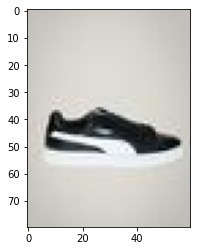

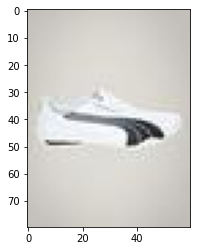

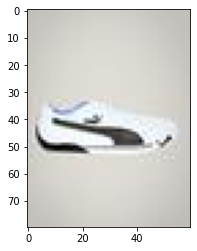

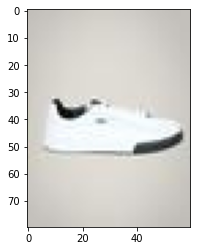

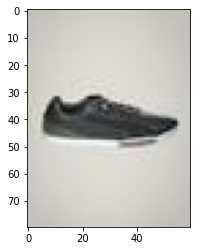

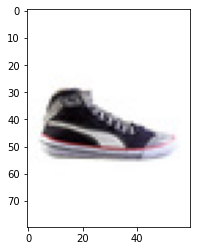

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

for i in pd.Series(files_name).iloc[ind[0]].values:
    img = PIL.Image.open(i)
    plt.imshow(img)
    plt.show()
